###Tópico 1


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parâmetros do problema
L = 25  # comprimento do domínio
T = 25  # tempo final
dx = 0.1  # passo espacial

# Condição inicial
def initial_condition(x):
    return np.exp(-20 * (x - 2)**2) + np.exp(-(x - 5)**2)

# Função para calcular a solução usando diferenças finitas
def solve_advection_diffusion(Pe):
    Nx = int(L / dx) + 1  # número de pontos no espaço

    # Arrays para armazenar a solução
    dt = 0.4*min(dx**2*Pe,dx)
    Nt = int(T / dt)
    u = np.zeros((Nt, Nx))
    x = np.linspace(0, L, Nx)
    t = np.linspace(0, T, Nt)


    # Condição inicial
    u[0, :] = initial_condition(x)

    # Loop temporal
    for n in range(Nt - 1):
        for i in range(0, Nx - 1):
            if Pe < 1:  # Caso Pe << 1
                u[n + 1, i] = u[n, i] - dt / 2/dx * (u[n, i+1] - u[n, i - 1]) + dt / Pe/dx**2 * (u[n, i + 1] - 2 * u[n, i] + u[n, i - 1])
            elif Pe == 1:  # Caso Pe = 1
                u[n + 1, i] = u[n, i] - dt / 2/dx * (u[n, i+1] - u[n, i - 1]) + dt / Pe/dx**2 * (u[n, i + 1] - 2 * u[n, i] + u[n, i - 1])
            elif Pe > 1:  # Caso Pe >> 1
                u[n + 1, i] = u[n, i] - dt / 2/dx * (u[n, i+1] - u[n, i - 1]) + dt / Pe/dx**2 * (u[n, i + 1] - 2 * u[n, i] + u[n, i - 1])

        # Condições de contorno periódicas
        u[n + 1, 0] = u[n + 1, -1]
        u[n + 1, -1] = u[n + 1, 0]

    return u, x, t

# Resolvendo para cada valor de Pe
Pe_values = [0.1, 1, 1000, 50]
solutions = []
for Pe in Pe_values:
    u_sol, x_sol, t_sol = solve_advection_diffusion(Pe)
    solutions.append((u_sol, x_sol, t_sol, Pe))
    #print(f"Solução para Pe={Pe}:")
    #print(u_sol[-1])

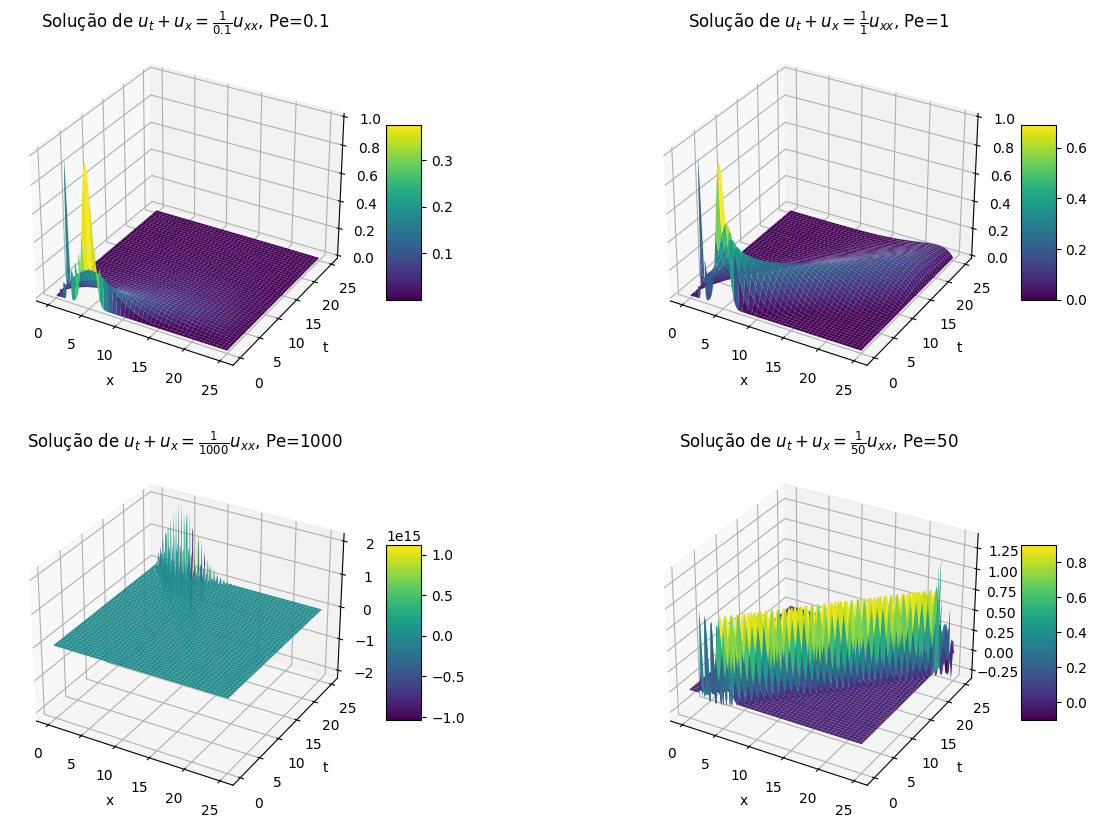

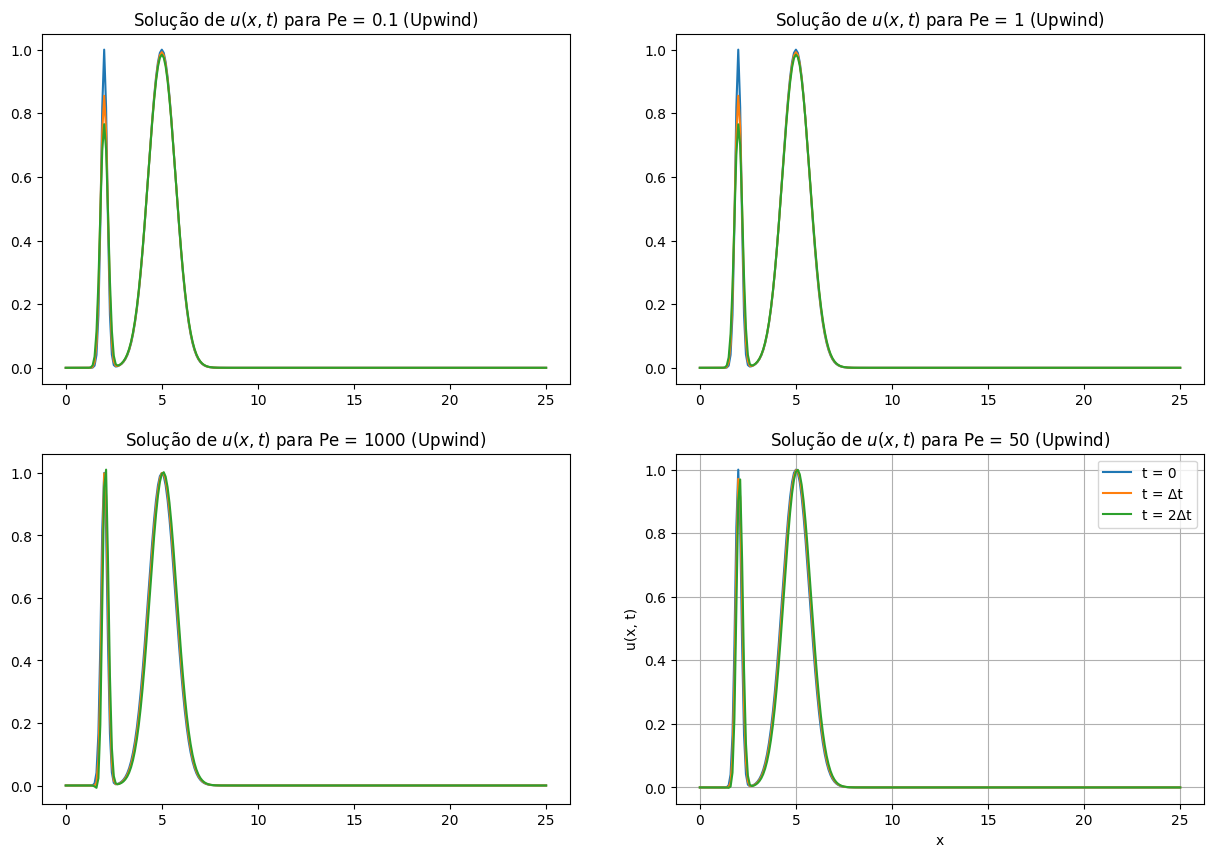

In [ ]:

# Plotando gráficos tridimensionais u(x, t) para cada caso de Pe
figs_3d = []
fig, axs = plt.subplots(2, 2, figsize=(15, 10), subplot_kw={"projection": "3d"})
axs = axs.flatten()

for idx, (u_sol, x_sol, t_sol, Pe) in enumerate(solutions):
    X, T = np.meshgrid(x_sol, t_sol)
    #fig = plt.figure(figsize=(10, 6))
    #ax = fig.add_subplot(111, projection='3d')
    surf = axs[idx].plot_surface(X, T, u_sol, cmap='viridis')
    axs[idx].set_title(f'Solução de $u_t + u_x = \\frac{{1}}{{{Pe}}} u_{{xx}}$, Pe={Pe}')
    axs[idx].set_xlabel('x')
    axs[idx].set_ylabel('t')
    axs[idx].set_zlabel('u(x, t)')
    fig.colorbar(surf, ax=axs[idx], shrink=0.5, aspect=5)
    figs_3d.append(fig)


# Mostrando todos os gráficos
plt.show()

# Plotando u como função de x nos tempos t = 0, Δt e 2Δt para cada caso de Pe
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.flatten()

for idx, (u_sol, x_sol, t_sol, Pe) in enumerate(solutions):
    dt = t_sol[1] - t_sol[0]
    times_indices = [0, 1, 2]  # Índices correspondentes a t = 0, Δt e 2Δt
    labels = ['t = 0', f't = Δt', f't = 2Δt']

    #plt.figure(figsize=(10, 6))
    for idx1, label in zip(times_indices, labels):
        axs[idx].plot(x_sol, u_sol[idx1, :], label=label)

    axs[idx].set_title(f'Solução de $u(x, t)$ para Pe = {Pe} (Upwind)')
    plt.xlabel('x') # Use plt.xlabel instead of axs[idx].xlabel
    plt.ylabel('u(x, t)') # Use plt.ylabel instead of axs[idx].ylabel
    plt.legend() # Use plt.legend instead of axs[idx].legend
    plt.grid(True)
    #plt.show() # Remove this line, the plots will be shown at the end
# Show all plots at once
plt.show()

###Tópico 2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parâmetros do problema
L = 25  # comprimento do domínio
T = 25  # tempo final
dx = 0.1  # passo espacial

# Condição inicial
def initial_condition(x):
    return np.exp(-20 * (x - 2)**2) + np.exp(-(x - 5)**2)

# Função para calcular a solução usando diferenças finitas
def solve_advection_diffusion_upwind(Pe):
    Nx = int(L / dx) + 1  # número de pontos no espaço
    dt = 0.4 * min(dx**2 * Pe, dx)
    Nt = int(T / dt)
    u = np.zeros((Nt, Nx))
    x = np.linspace(0, L, Nx)
    t = np.linspace(0, T, Nt)

    # Condição inicial
    u[0, :] = initial_condition(x)

    # Loop temporal
    for n in range(Nt - 1):
        for i in range(1, Nx - 1):
            advective_term = (u[n, i] - u[n, i - 1]) / dx
            diffusive_term = (u[n, i + 1] - 2 * u[n, i] + u[n, i - 1]) / dx**2
            u[n + 1, i] = u[n, i] - dt * advective_term + (dt / Pe) * diffusive_term

        # Condições de contorno periódicas
        u[n + 1, 0] = u[n + 1, -2]
        u[n + 1, -1] = u[n + 1, 1]

    return u, x, t

# Resolvendo para cada valor de Pe
Pe_values = [0.1, 1, 1000, 50]
solutions = []
for Pe in Pe_values:
    u_sol, x_sol, t_sol = solve_advection_diffusion_upwind(Pe)
    solutions.append((u_sol, x_sol, t_sol, Pe))

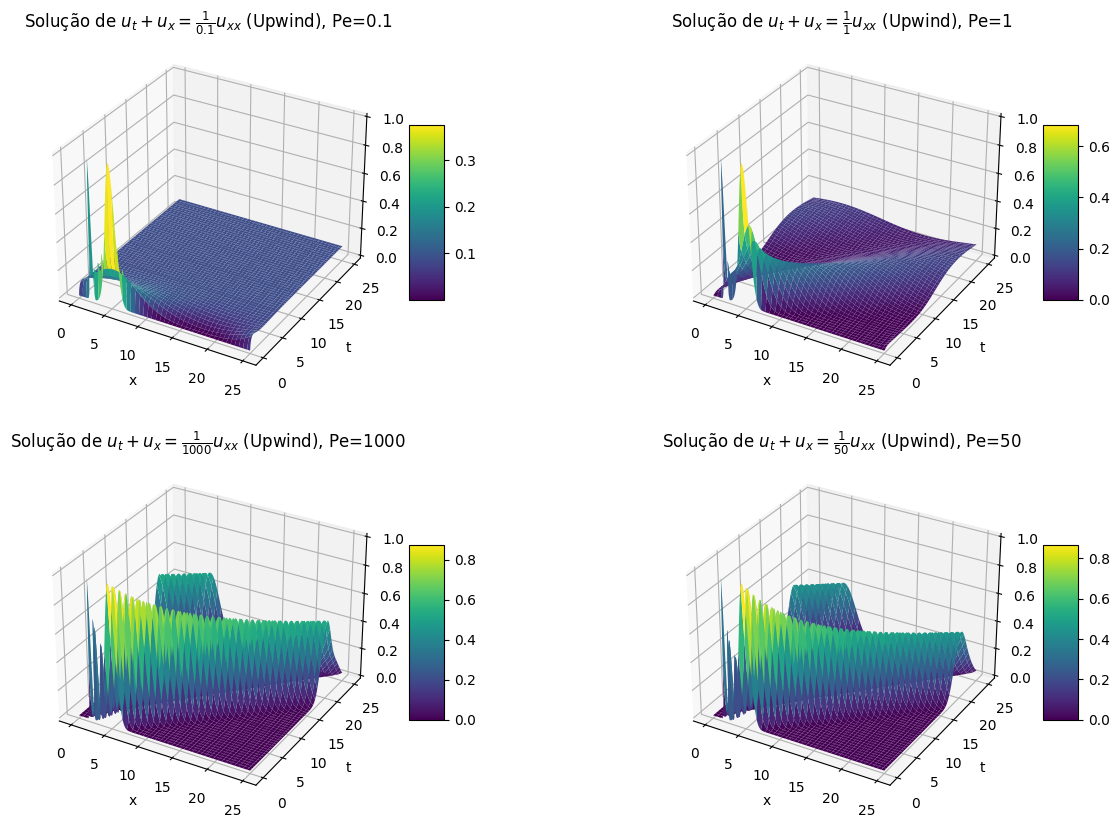

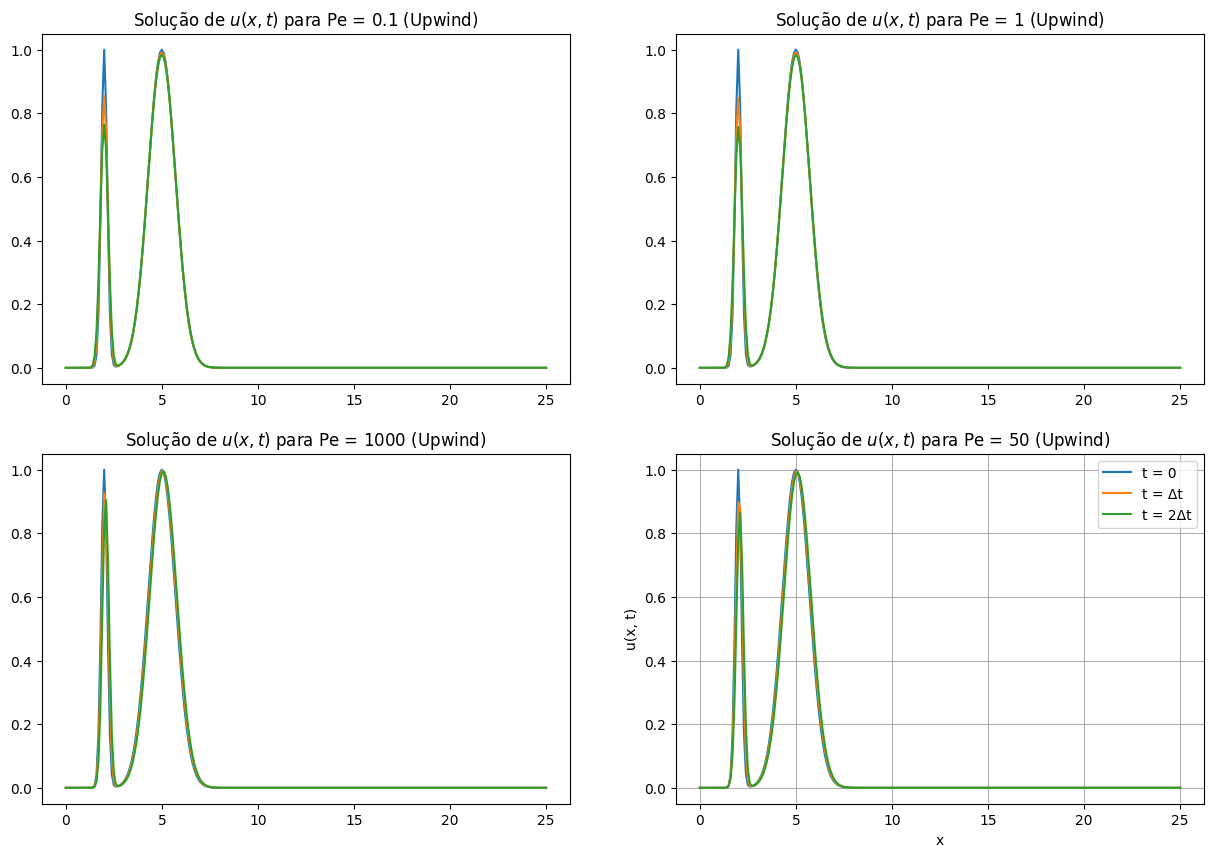

In [ ]:
# Plotando gráficos tridimensionais u(x, t) para cada caso de Pe
figs_3d = []
fig, axs = plt.subplots(2, 2, figsize=(15, 10), subplot_kw={"projection": "3d"})
axs = axs.flatten()

for idx, (u_sol, x_sol, t_sol, Pe) in enumerate(solutions):
    X, T = np.meshgrid(x_sol, t_sol)
    #fig = plt.figure(figsize=(10, 6))
    #ax = fig.add_subplot(111, projection='3d')

    surf = axs[idx].plot_surface(X, T, u_sol, cmap='viridis')
    axs[idx].set_title(f'Solução de $u_t + u_x = \\frac{{1}}{{{Pe}}} u_{{xx}}$ (Upwind), Pe={Pe}')
    axs[idx].set_xlabel('x')
    axs[idx].set_ylabel('t')
    axs[idx].set_zlabel('u(x, t)')
    fig.colorbar(surf, ax=axs[idx], shrink=0.5, aspect=5)
    figs_3d.append(fig)

# Plotando u como função de x nos tempos t = 0, Δt e 2Δt para cada caso de Pe

fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.flatten()

for idx, (u_sol, x_sol, t_sol, Pe) in enumerate(solutions):
    dt = t_sol[1] - t_sol[0]
    times_indices = [0, 1, 2]  # Índices correspondentes a t = 0, Δt e 2Δt
    labels = ['t = 0', f't = Δt', f't = 2Δt']

    #plt.figure(figsize=(10, 6))
    for idx1, label in zip(times_indices, labels):
        axs[idx].plot(x_sol, u_sol[idx1, :], label=label)

    axs[idx].set_title(f'Solução de $u(x, t)$ para Pe = {Pe} (Upwind)')
    plt.xlabel('x') # Use plt.xlabel instead of axs[idx].xlabel
    plt.ylabel('u(x, t)') # Use plt.ylabel instead of axs[idx].ylabel
    plt.legend() # Use plt.legend instead of axs[idx].legend
    plt.grid(True)
    #plt.show() # Remove this line, the plots will be shown at the end
# Show all plots at once
plt.show()


###Tópico 3


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros do problema
L = 25  # comprimento do domínio
T = 17  # tempo final
dx = 0.05  # passo espacial
dt = 0.8 * dx  # passo temporal (Courant number = 0.8)
Nx = int(L / dx) + 1  # número de pontos no espaço
Nt = int(T / dt)  # número de pontos no tempo

# Condição inicial
def initial_condition(x):
    return np.exp(-20 * (x - 2)**2) + np.exp(-(x - 5)**2)

# Método Upwind
def upwind(u, dx, dt, Nx):
    unew = np.zeros_like(u)
    for n in range(1, len(u)):
        for i in range(1, Nx):
            unew[i] = u[i] - dt/dx * (u[i] - u[i-1])
        u = np.copy(unew)
        u[0] = u[-1]
        u[-1] = u[0]
    return u

# Método Lax-Wendroff
def lax_wendroff(u, dx, dt, Nx):
    unew = np.zeros_like(u)
    for n in range(1, len(u)):
        for i in range(1, Nx-1):
            unew[i] = (u[i] - dt/(2*dx)*(u[i+1] - u[i-1]) +
                       (dt**2)/(2*dx**2)*(u[i+1] - 2*u[i] + u[i-1]))
        u = np.copy(unew)
        u[0] = u[-1]
        u[-1] = u[0]
    return u

# Método Leapfrog
def leapfrog(u, dx, dt, Nx):
    u_past = np.copy(u)
    unew = np.zeros_like(u)
    for n in range(1, len(u)):
        if n == 1:
            for i in range(1, Nx-1):
                unew[i] = u[i] - dt/(2*dx)*(u[i+1] - u[i-1])
        else:
            for i in range(1, Nx-1):
                unew[i] = u_past[i] - dt/dx * (u[i+1] - u[i-1])
            u_past = np.copy(u)
        u = np.copy(unew)
        u[0] = u[-1]
        u[-1] = u[0]
    return u

# Espaço e tempo
x = np.linspace(0, L, Nx)
u0 = initial_condition(x)
t = np.linspace(0, T, Nt)

# Solução exata (deslocada pela velocidade)
exact_solution = initial_condition((x - T) % L)

# Aplicação dos métodos
u_upwind = upwind(u0.copy(), dx, dt, Nx)
u_lax_wendroff = lax_wendroff(u0.copy(), dx, dt, Nx)
u_leapfrog = leapfrog(u0.copy(), dx, dt, Nx)

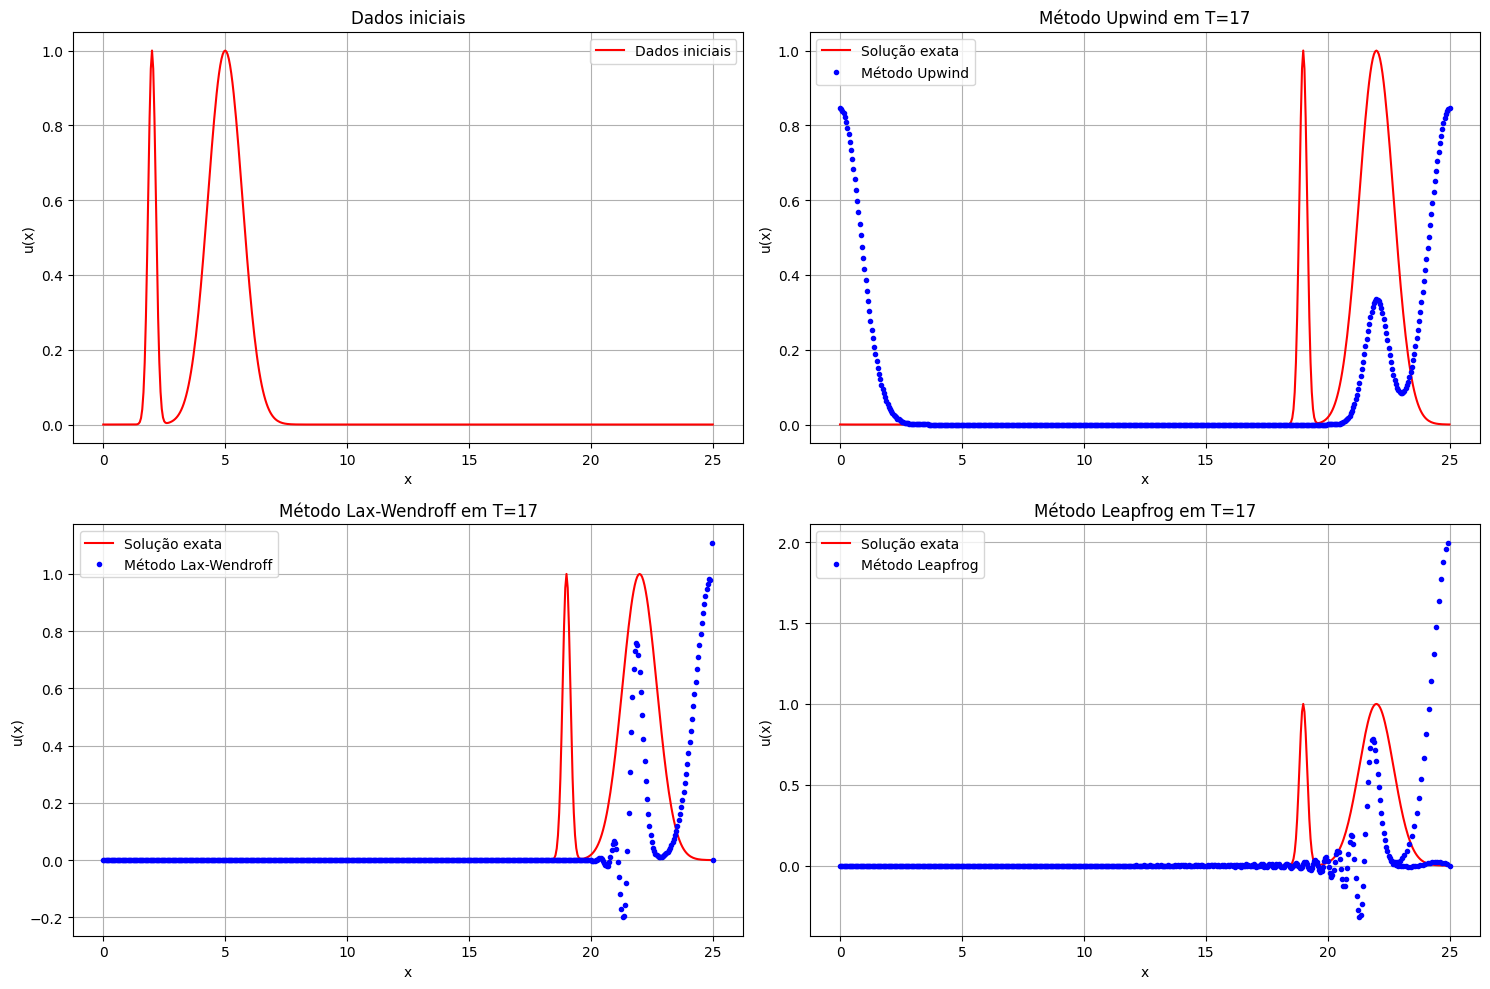

In [ ]:
# Plotando os resultados
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.plot(x, u0, 'r', label='Dados iniciais')
plt.title('Dados iniciais')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(x, exact_solution, 'r', label='Solução exata')
plt.plot(x, u_upwind, 'b.', label='Método Upwind')
plt.title('Método Upwind em T=17')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(x, exact_solution, 'r', label='Solução exata')
plt.plot(x, u_lax_wendroff, 'b.', label='Método Lax-Wendroff')
plt.title('Método Lax-Wendroff em T=17')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(x, exact_solution, 'r', label='Solução exata')
plt.plot(x, u_leapfrog, 'b.', label='Método Leapfrog')
plt.title('Método Leapfrog em T=17')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
